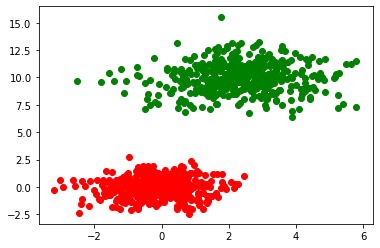

In [101]:
import numpy as np
import matplotlib.pyplot as plt
NumDataPerClass=200
m1=[[2.5,2.5]]
m2=[[10,10]]
C=[[2,1],[1,2]]

A=np.linalg.cholesky(C) #Return the Cholesky decomposition
X1=np.random.randn(NumDataPerClass,2) #Return a sample (or samples) from the “standard normal” distribution.
Y1=X1 @ A+m1# customise to corresponding mean and covariance

X2=np.random.randn(NumDataPerClass,2)
Y2=X2 @ A +m2

# print(A)
# print(C)
plt.scatter(X1,X2,c='red')# standard
plt.scatter(Y1,Y2,c='green')# with mean of m1,m2 and covariance of C

In [3]:
#demonstration of cholesky decomposition
z_test=np.array([[5,0,0],[3,3,0],[-1,1,3]])
z_test_T=z_test.T


x_test=np.array([[25,15,-5],[15,18,0],[-5,0,11]])
y_test=np.linalg.cholesky(x_test)
print('y_test:', y_test)
print('z_test:', z_test)
print('z_test_T:', z_test_T)
print('z_test @ z_test_T:', z_test @ z_test_T)

y_test: [[ 5.  0.  0.]
 [ 3.  3.  0.]
 [-1.  1.  3.]]
z_test: [[ 5  0  0]
 [ 3  3  0]
 [-1  1  3]]
z_test_T: [[ 5  3 -1]
 [ 0  3  1]
 [ 0  0  3]]
z_test @ z_test_T: [[25 15 -5]
 [15 18  0]
 [-5  0 11]]


In [102]:
Y= np.concatenate((Y1,Y2))


# Join a sequence of arrays along an existing axis.

# e.g.
# a = np.array([[1, 2], [3, 4]])
# b = np.array([[5, 6]])
# np.concatenate((a, b), axis=0)
# array([[1, 2],
#        [3, 4],
#        [5, 6]])

In [103]:
labelPos =np.ones(NumDataPerClass) 
#Return a new array of given shape and type, filled with ones.

# example
# np.ones(5)
# array([1., 1., 1., 1., 1.])
labelNeg=-1.0*np.ones(NumDataPerClass) 
f= np.concatenate((labelPos,labelNeg))

In [104]:
O=np.ones((2*NumDataPerClass,1))
Y=np.append(Y,O,axis=1)

In [105]:
print(Y.shape)
print(Y)

(400, 3)
[[ 2.10683856  1.8314049   1.        ]
 [ 2.88284672  1.1970124   1.        ]
 [ 1.68555594  4.69260599  1.        ]
 ...
 [10.8833584   9.99525202  1.        ]
 [12.58417523 11.2986587   1.        ]
 [ 7.2539448   9.45833257  1.        ]]


In [106]:
rIndex=np.random.permutation(2*NumDataPerClass)

#Randomly permute a sequence, or return a permuted range.

# example
# np.random.permutation(10)
# array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6])

Yr=Y[rIndex,]#reshuffled dataset
fr=f[rIndex]#reshuffled label

Y_train=Yr[0:NumDataPerClass]#the data for training set
f_train=fr[0:NumDataPerClass]#the label for training set

Y_test=Yr[NumDataPerClass:2*NumDataPerClass]#the data for test set
f_test=fr[NumDataPerClass:2*NumDataPerClass]#the label for test set
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)

Ntrain= NumDataPerClass;
Ntest= NumDataPerClass;

(200, 3) (200,) (200, 3) (200,)


In [107]:
def PercentCorrect(Inputs,targets, weights):
    N=len(targets)
    nCorrect =0
    for n in range(N):
        OneInput=Inputs[n,:]
        if(targets[n]*np.dot(OneInput, weights)>0):
            nCorrect +=1
    return 100*nCorrect/N        

In [108]:
a=np.random.randn(3)
print('Initial classifier:',a)

print('Initial Percentage Correct:', PercentCorrect(Y_train, f_train,a))

MaxIter=400
alpha=0.01

P_train=np.zeros(MaxIter)
P_test=np.zeros(MaxIter)

for iter in range(MaxIter):
    r=np.floor(np.random.rand()*Ntrain).astype(int)
    y=Y_train[r,:]
    
    if (f_train[r]*np.dot(y,a)<0):
        a +=alpha*f_train[r]*y
        
    P_train[iter]=PercentCorrect(Y_train, f_train,a);
    P_test[iter]=PercentCorrect(Y_test, f_test,a);

print('Classifier After Training:',a)
print('Percentage Correct After Training:',PercentCorrect(Y_train,f_train,a),PercentCorrect(Y_test,f_test,a))   


Initial classifier: [ 1.62354207  0.95507871 -0.53176927]
Initial Percentage Correct: 48.0
Classifier After Training: [-0.04710134 -0.02414161  0.27823073]
Percentage Correct After Training: 97.0 93.5


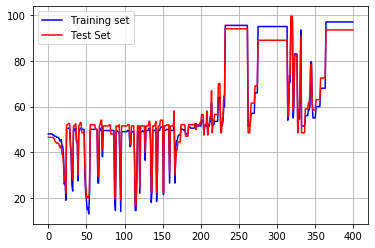

In [109]:

plt.plot(range(MaxIter),P_train,'b',range(MaxIter),P_test,'r')
plt.grid(True)
plt.gca().legend(('Training set','Test Set'))

In [110]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model=Perceptron()
model.fit(Y_train,f_train)
fh_test=model.predict(Y_test)
print(accuracy_score(fh_test,f_test))


0.985


In [114]:
#classify iris data using your own perceptron algorithm
import pandas as pd
iris=pd.read_csv("iris.data",index_col=False,header=None)
print(iris.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [115]:
iris=iris[iris.iloc[:, -1] != 'Iris-virginica']# remain only 2 clasees for binary classification
iris=iris.sample(frac=1)#Shuffle the dataset https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
print(iris.shape)
Y=iris.iloc[:, [0,1,2,3]]
f=iris.iloc[:, [4]]
print(Y.head())
print(f.head())

(100, 5)
      0    1    2    3
81  5.5  2.4  3.7  1.0
59  5.2  2.7  3.9  1.4
23  5.1  3.3  1.7  0.5
41  4.5  2.3  1.3  0.3
79  5.7  2.6  3.5  1.0
                  4
81  Iris-versicolor
59  Iris-versicolor
23      Iris-setosa
41      Iris-setosa
79  Iris-versicolor


In [120]:
iris_train=iris[:50]
iris_test=iris[-50:]

In [134]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model=Perceptron()
model.fit(iris_train.iloc[:, [0,1,2,3]],iris_train.iloc[:, [4]].values.ravel())
#for the '.values.ravel()' :https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
fh_test=model.predict(iris_test.iloc[:, [0,1,2,3]])
print(accuracy_score(fh_test,iris_test.iloc[:, [4]]))


1.0


In [136]:
# For the snapshot of the lab report
#load the data
import pandas as pd
iris=pd.read_csv("iris.data",index_col=False,header=None)

#Filter only 2 classes for classification
iris=iris[iris.iloc[:, -1] != 'Iris-virginica']

#Shuffle the data
iris=iris.sample(frac=1)

#Split the train and test set
iris_train=iris[:50]
iris_test=iris[-50:]

#Fit the model with sklearn
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model=Perceptron()
model.fit(iris_train.iloc[:, [0,1,2,3]],iris_train.iloc[:, [4]].values.ravel())
fh_test=model.predict(iris_test.iloc[:, [0,1,2,3]])
print(accuracy_score(fh_test,iris_test.iloc[:, [4]]))

1.0
